In [ ]:
import requests

url = f'https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit={limit}'

data = requests.get(url).json()
records = data['result']['records']

In [ ]:
import pandas as pd

df = pd.DataFrame(records)
df = df.rename(columns={'CHLOCCT': 'country_name'})

print(df)

In [ ]:
df_group_by = df.groupby(['country_name'])['_id'].count().reset_index(name='num_of_flights')

In [ ]:
df_sorted = df_group_by.sort_values('num_of_flights', ascending=False)

In [48]:
df_sorted_and_contry_limit = df_sorted.head(country_limit)

<AxesSubplot:xlabel='country_name'>

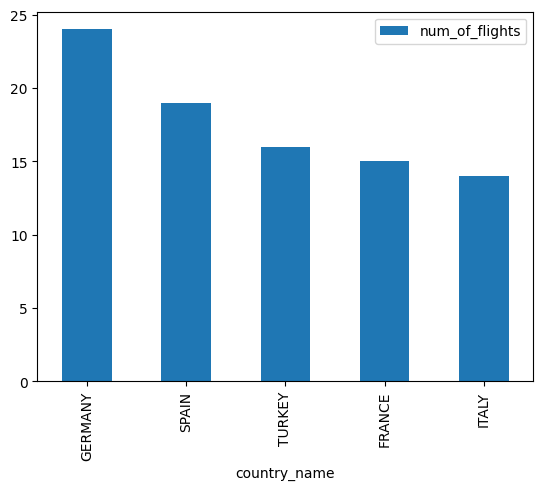

In [49]:
df_sorted_and_contry_limit.plot.bar(x='country_name', y='num_of_flights')

In [ ]:
import awswrangler as wr

df_sorted_and_contry_limit.set_index('country_name', inplace=True)
df_sorted_and_contry_limit

wr.s3.to_csv(
    df = df_sorted_and_contry_limit,
    path = 's3://aiola-469190457957-h-playground/misc/num_of_flights.csv'
)